# FRAUDULENT TRANSACTION DETECTION

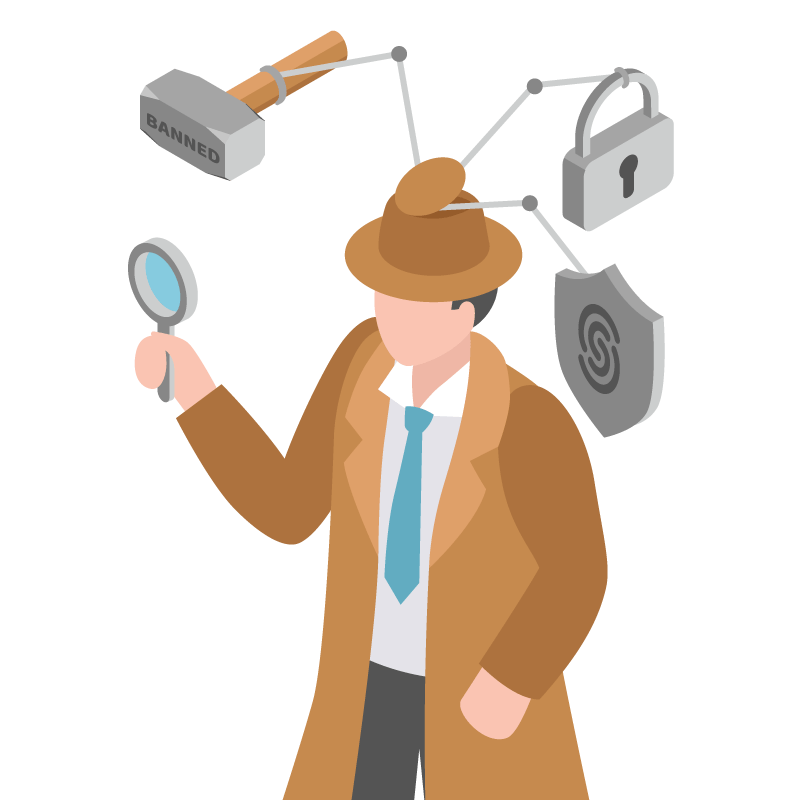

<b>Dataset Description:</b>

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from jupyter_datatables import init_datatables_mode
init_datatables_mode()

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

In [4]:
df = pd.read_csv('Fraud.csv')
df.head(10)

<JupyterRequire.display.SafeScript object>

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.shape

(6362620, 11)

<b>The dataset consists of 6362620 rows and 11 columns.</b>

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<b>The dataset consists of 11 columns. Here, the column 'isFraud' is the target variable and the remaining columns are the features.</b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<b>As we can see, the columns 'type', 'nameOrig' and 'nameDest' are of object datatype. So, we need to carry out encoding.</b>

In [8]:
# Let's check the number of unique values present in the dataset

df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
# Let's check duplicate values

df.duplicated().sum()

0

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<b>As we can see, there are no null values in the dataset.</b>

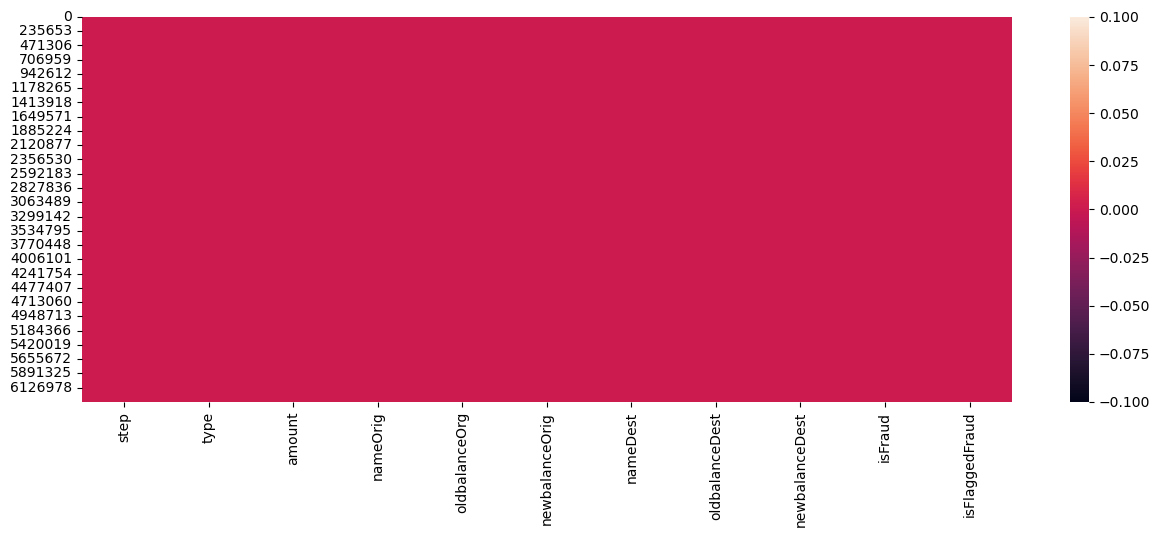

In [11]:
# Let's create a Heat Map

plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

<b>We can confirm that there are no null values in the dataset by looking at the Heat Map.</b>

In [12]:
# Count the number of fraudulent and non-fraudulent transactions
fraudulent_count = df['isFraud'].sum()
non_fraudulent_count = len(df) - fraudulent_count

# Calculate the percentage of fraudulent and non-fraudulent transactions
total_count = len(df)
fraudulent_percentage = round((fraudulent_count / total_count) * 100, 2)
non_fraudulent_percentage = round((non_fraudulent_count / total_count) * 100, 2)

# Display the results
print("Number of Fraudulent Transactions:", fraudulent_count)
print("Number of Non-Fraudulent Transactions:", non_fraudulent_count)
print("Percentage of Fraudulent Transactions:", fraudulent_percentage)
print("Percentage of Non-Fraudulent Transactions:", non_fraudulent_percentage)

Number of Fraudulent Transactions: 8213
Number of Non-Fraudulent Transactions: 6354407
Percentage of Fraudulent Transactions: 0.13
Percentage of Non-Fraudulent Transactions: 99.87


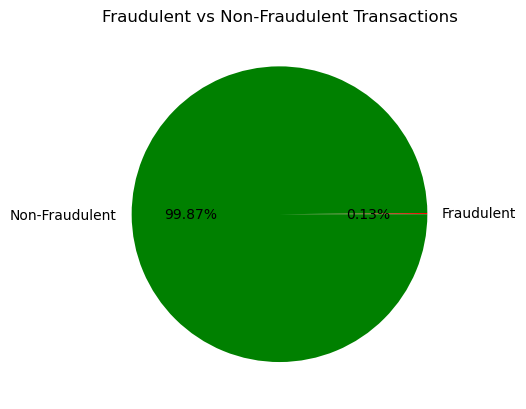

In [13]:
# Calculate the number and percentage of fraudulent and non-fraudulent transactions
fraudulent_count = df['isFraud'].sum()
non_fraudulent_count = len(df) - fraudulent_count
total_count = len(df)
fraudulent_percentage = round((fraudulent_count / total_count) * 100, 2)
non_fraudulent_percentage = round((non_fraudulent_count / total_count) * 100, 2)

# Create a pie chart
labels = ['Fraudulent', 'Non-Fraudulent']
sizes = [fraudulent_count, non_fraudulent_count]
percentages = [fraudulent_percentage, non_fraudulent_percentage]
colors = ['red', 'green']

plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title('Fraudulent vs Non-Fraudulent Transactions')

# Show the plot
plt.show()

<b>As we can see, this is a highly imbalanced dataset. Hence, we can use Random Forest and Decision Trees to build our model.</b>

In [14]:
# Let's analyze the column 'nameDest'

X = df[df['nameDest'].str.contains('M')]
X.head(10)

<JupyterRequire.display.SafeScript object>

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.0,0,0
11,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.0,0,0
12,1,PAYMENT,2560.74,C1648232591,5070.00,2509.26,M972865270,0.0,0.0,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.0,0.0,0,0


<b>As we can see, there is no information for customers that start with M (Merchants).</b>

# Data Visualization

In [15]:
# Select categorical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()

# Select numerical columns
numerical_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

# Print the lists of categorical and numerical columns
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['type', 'nameOrig', 'nameDest']
Numerical columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


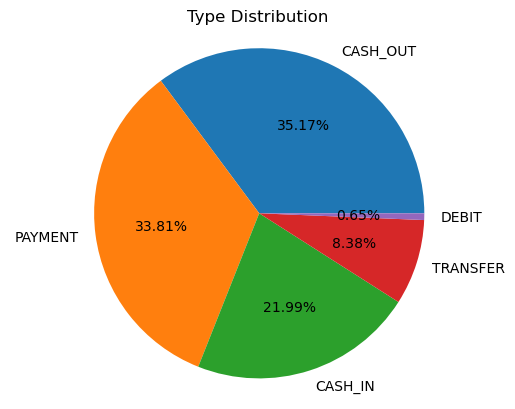

In [16]:
# Calculate value counts
value_counts = df['type'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(value_counts, labels=value_counts.index, autopct='%.2f%%')

# Set aspect ratio to be equal, creating a circular pie chart
ax.axis('equal')

# Add a title
ax.set_title('Type Distribution')

# Display the chart
plt.show()

In [17]:
# Let's create the column indicating time of the transaction in 24 hour format.

df['hour'] = df['step']-(24*(df['step']//24))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  hour            int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 582.5+ MB


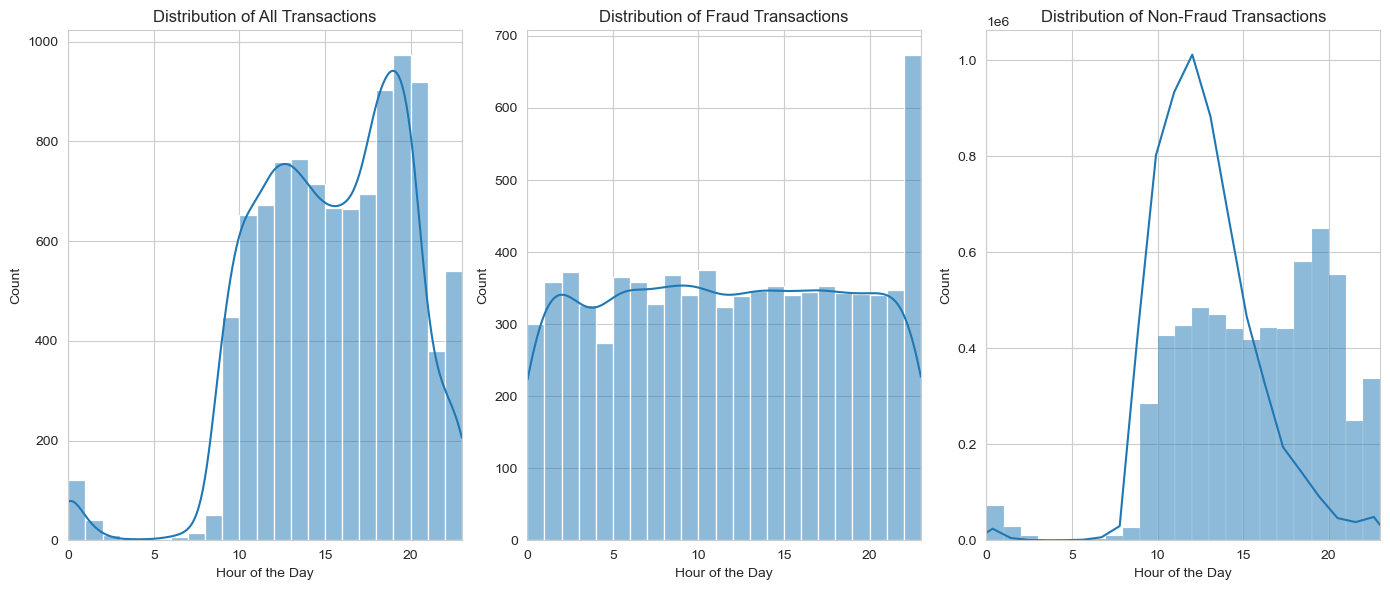

In [18]:
# Set figure size and style
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')

# Plot 1: Distribution of all transactions
plt.subplot(1, 3, 1)
sns.histplot(data=df.sample(10000), x='hour', bins=23, kde=True)
plt.title('Distribution of All Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xlim(0, 23)

# Plot 2: Distribution of fraud transactions
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['isFraud'] == 1], x='hour', bins=23, kde=True)
plt.title('Distribution of Fraud Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xlim(0, 23)

# Plot 3: Distribution of non-fraud transactions
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['isFraud'] == 0], x='hour', bins=23, kde=True, kde_kws={'cut': 500})
plt.title('Distribution of Non-Fraud Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xlim(0, 23)

# Adjust subplot spacing
plt.tight_layout()

# Display all plots
plt.show()

<b>As we can see, transactions happen mostly during the regular working hours, whereas fraud transactions take place throughout the day.</b>

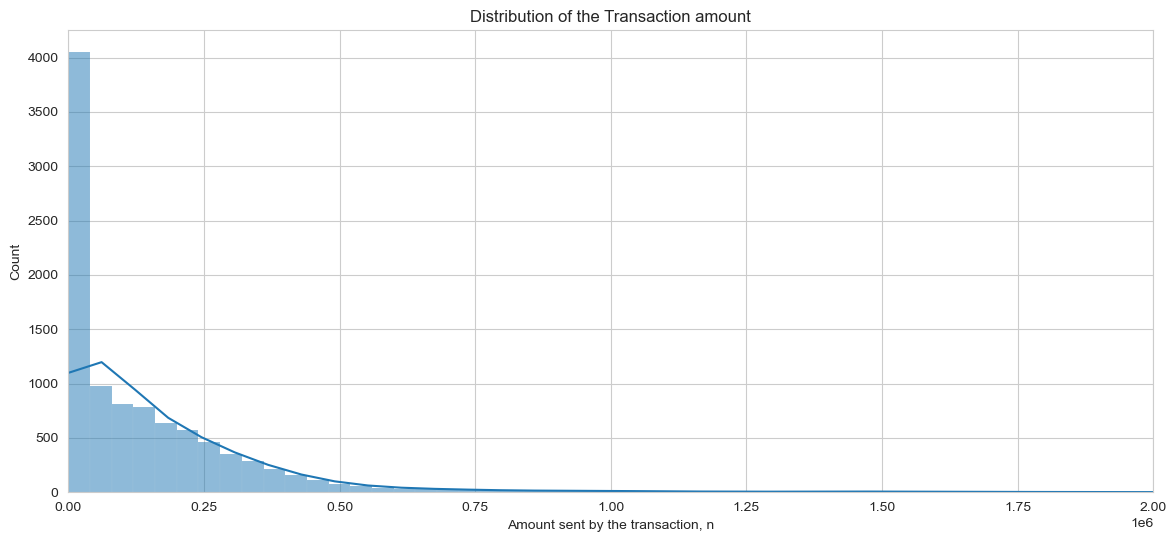

In [19]:
bins1 = np.arange(0, max(df.amount)+4e4, 4e4)
plt.figure(figsize=(14,6))
sns.histplot(data = df.sample(10000), x='amount', bins=bins1, kde=True)
plt.title('Distribution of the Transaction amount')
plt.xlabel('Amount sent by the transaction, n')
plt.xlim(0,2e6);

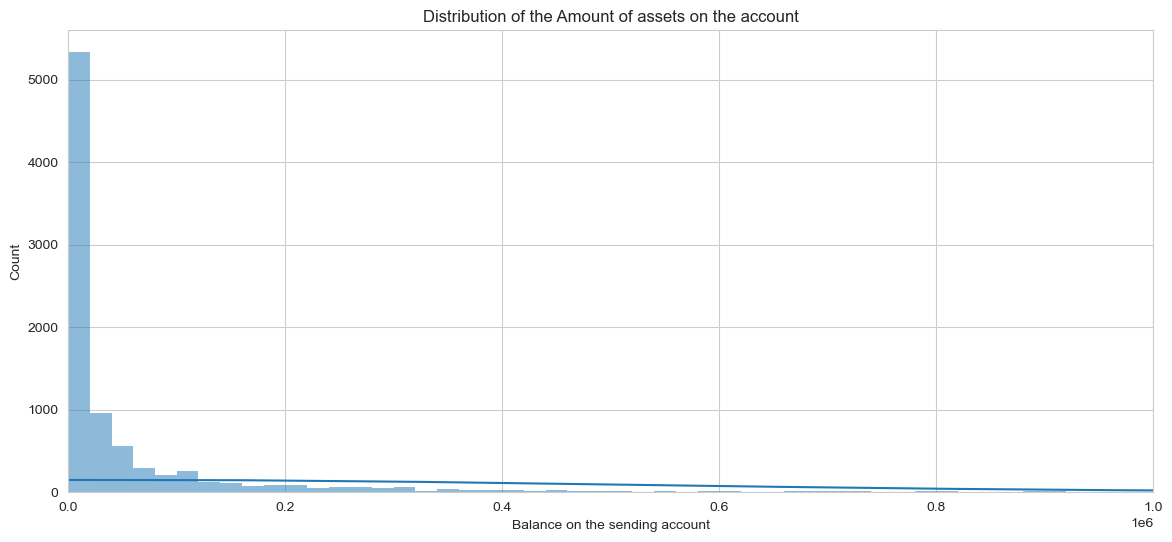

In [20]:
bins2 = np.arange(0, max(df.amount)+2e4, 2e4)
plt.figure(figsize=(14,6))
sns.histplot(data = df.sample(10000), x='oldbalanceOrg', bins=bins2, kde=True)
plt.title('Distribution of the Amount of assets on the account')
plt.xlabel('Balance on the sending account')
plt.xlim(0,1e6);

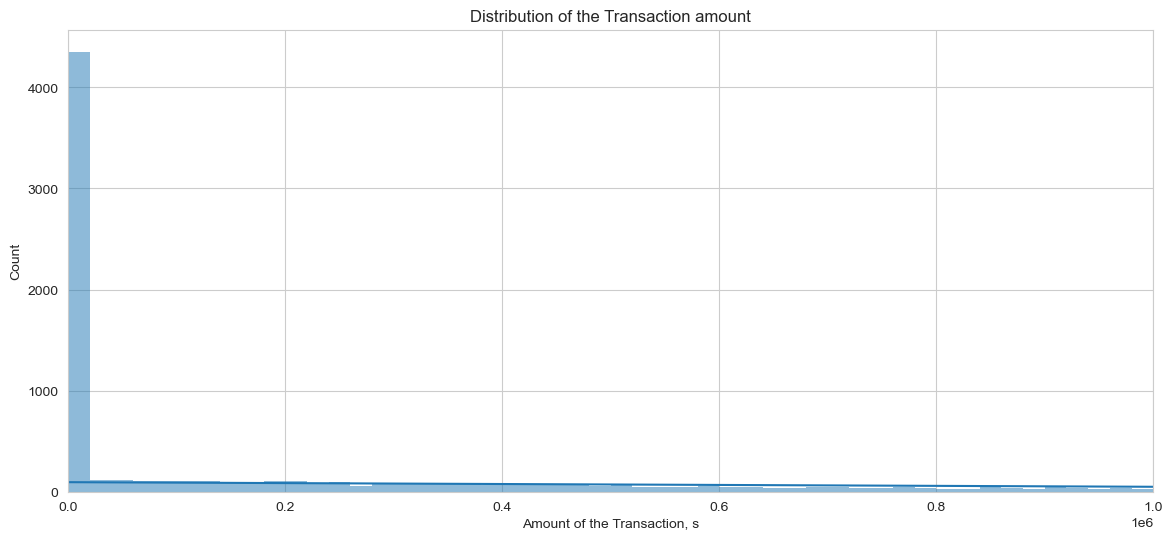

In [21]:
bins3 = np.arange(0, max(df.sample(10000).amount)+2e4, 2e4)
plt.figure(figsize=(14,6))
sns.histplot(data = df.sample(10000), x='oldbalanceDest', bins=bins3, kde=True)
plt.title('Distribution of the Transaction amount')
plt.xlabel('Amount of the Transaction, s')
plt.xlim(0,1e6);

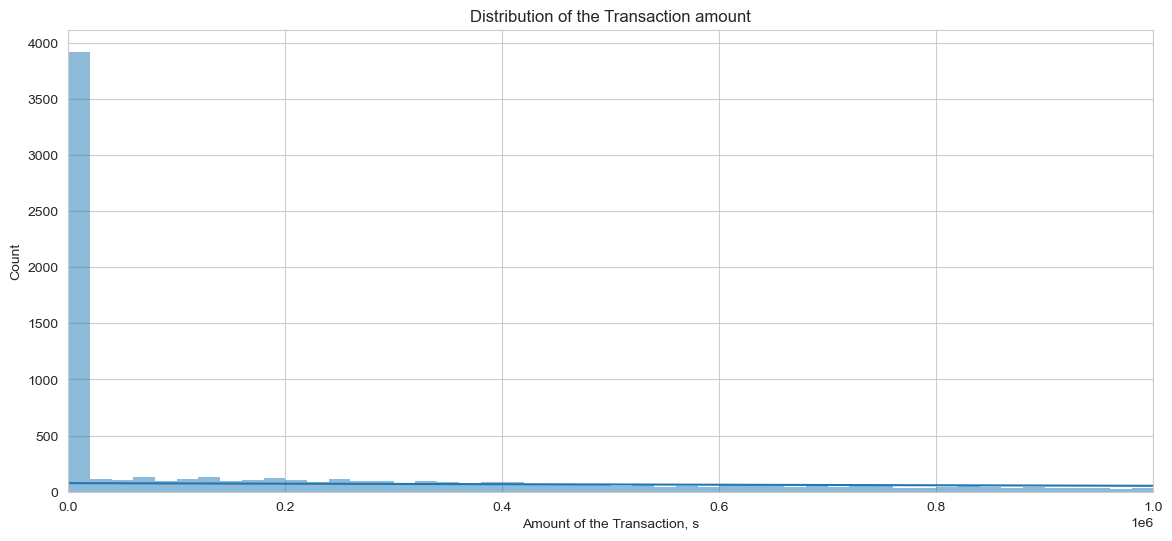

In [22]:
bins4 = np.arange(0, max(df.sample(10000).amount)+2e4, 2e4)
plt.figure(figsize=(14,6))
sns.histplot(data = df.sample(10000), x='newbalanceDest', bins=bins4, kde=True)
plt.title('Distribution of the Transaction amount')
plt.xlabel('Amount of the Transaction, s')
plt.xlim(0,1e6);

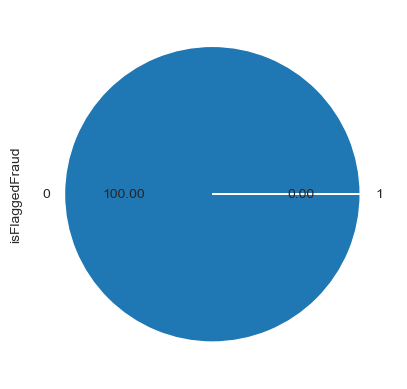

In [23]:
df['isFlaggedFraud'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

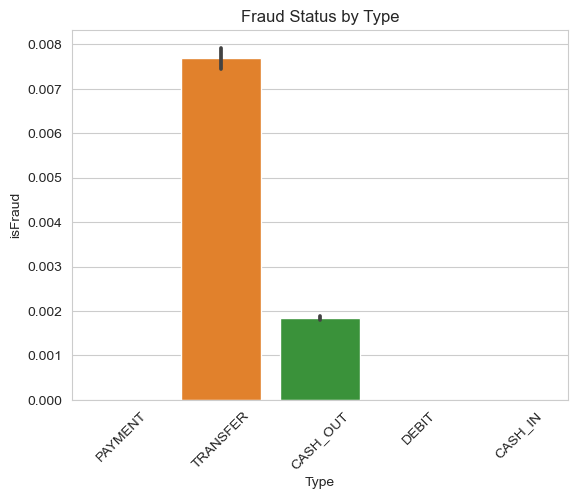

In [24]:
# Create a grouped bar plot
sns.barplot(x='type', y='isFraud', data=df)

# Set plot aesthetics
plt.xlabel('Type')
plt.ylabel('isFraud')
plt.title('Fraud Status by Type')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [25]:
# let's create a copy of the original dataset to train and test models

df_new=df.copy()
df_new.head()

<JupyterRequire.display.SafeScript object>

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  hour            int64  
dtypes: float64(5), int32(3), int64(4)
memory usage: 509.7 MB


# Multicollinearity

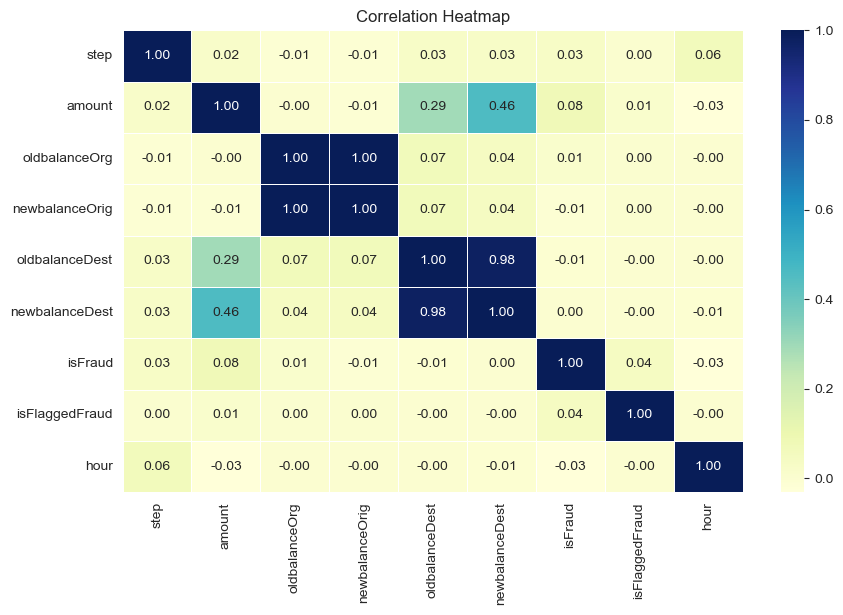

In [28]:
# Calculate correlation matrix
corr = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df_new)

<JupyterRequire.display.SafeScript object>

,variables,VIF
0,step,3.563182
1,type,4.819343
2,amount,4.157996
3,nameOrig,3.444136
4,oldbalanceOrg,583.130216
5,newbalanceOrig,590.149166
6,nameDest,3.319267
7,oldbalanceDest,73.624578
8,newbalanceDest,85.212301
9,isFraud,1.195415


<b>Observations:</b>

* 'oldbalanceOrg' and 'newbalanceOrig' have VIF values of 583.13 and 590.14, respectively, indicating strong multicollinearity.
* 'oldbalanceDest' and 'newbalanceDest' have VIF values of 73.62 and 85.21, respectively, also indicating strong multicollinearity.
* Other features have VIF values below 5, suggesting moderate or no multicollinearity.

In [30]:
# Let's calculate the balance originated ('Balance_orig') by subtracting the 'newbalanceOrig' from the 'oldbalanceOrg' column directly.

df_new['Balance_orig'] = df_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)

In [31]:
# Let's calculate the balance at the destination ('Balance_dest') by subtracting the 'newbalanceDest' from the 'oldbalanceDest' column directly.

df_new['Balance_dest'] = df_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

In [32]:
# Let's create a new column 'TransactionPath' by concatenating the 'nameOrig' and 'nameDest' columns using the + operator.

df_new['TransactionPath'] = df_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

In [33]:
# Dropping columns

df_new = df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df_new)

<JupyterRequire.display.SafeScript object>

,variables,VIF
0,type,3.045087
1,amount,3.901357
2,isFraud,1.187354
3,isFlaggedFraud,1.002589
4,hour,4.506345
5,Balance_orig,1.354968
6,Balance_dest,3.796739
7,TransactionPath,4.374677


# Normalizing (Scaling)

In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
df_new['NormalizedAmount'] = scaler.fit_transform(df_new['amount'].values.reshape(-1, 1))
df_new.drop(['amount'], inplace= True, axis= 1)

<b>I have not normalized the complete dataset, as it may lead to decrease in accuracy of the model.</b>

In [35]:
df_new.head(10)

<JupyterRequire.display.SafeScript object>

,type,isFraud,isFlaggedFraud,hour,Balance_orig,Balance_dest,TransactionPath,NormalizedAmount
0,3,0,0,1,9839.64,0.00,2419963.0,-0.281560
1,3,0,0,1,1864.28,0.00,3922922.0,-0.294767
2,4,1,0,1,181.00,0.00,1441841.0,-0.297555
3,1,1,0,1,181.00,21182.00,6219958.0,-0.297555
4,3,0,0,1,11668.14,0.00,4274900.0,-0.278532
5,3,0,0,1,7817.71,0.00,8273743.0,-0.284908
6,3,0,0,1,7107.77,0.00,3869310.0,-0.286084
7,3,0,0,1,7861.64,0.00,5313179.0,-0.284836
8,3,0,0,1,2671.00,0.00,1638080.0,-0.291190
9,2,0,0,1,5337.77,1549.21,5690236.0,-0.289015


# Separating dependent and independent variables

In [36]:
X = df_new.drop(['isFraud'], axis= 1)
Y = df_new['isFraud']

In [37]:
X.shape

(6362620, 7)

In [38]:
Y.shape

(6362620,)

# Train Test Split

In [39]:
# Now, let's split the data into training and testing data

from sklearn.model_selection import train_test_split

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 7)
Shape of X_test:  (1908786, 7)


# Decision Tree Classifier

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
print(f"Accuracy Score: {accuracy_score(Y_test, pred_dtc)*100}%")
print(f"roc_auc_score: {roc_auc_score(Y_test, pred_dtc)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, pred_dtc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test, pred_dtc)}")

Accuracy Score: 99.9380234347905%
roc_auc_score: 88.01301056214304%
---------------------------------------------------
Confusion Matrix : 
 [[1905751     600]
 [    583    1852]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.76      0.76      0.76      2435

    accuracy                           1.00   1908786
   macro avg       0.88      0.88      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



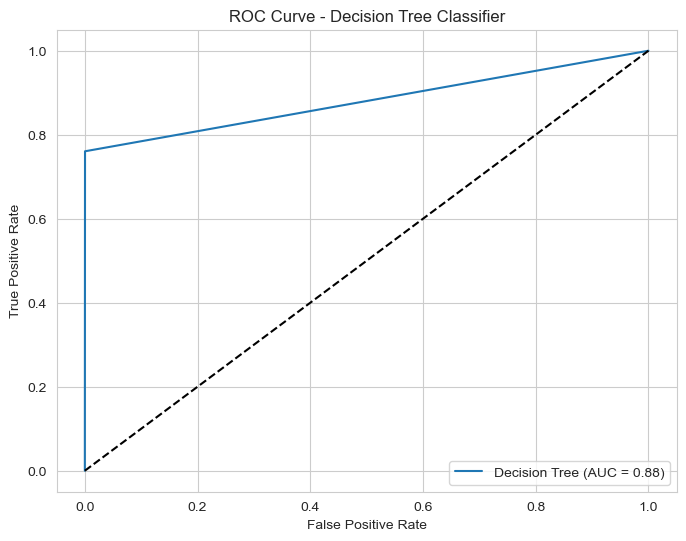

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(Y_test, pred_dtc)

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, pred_dtc)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)
print(f"Accuracy Score: {accuracy_score(Y_test, pred_rfc)*100}%")
print(f"roc_auc_score: {roc_auc_score(Y_test, pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(Y_test, pred_rfc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test, pred_rfc)}")

Accuracy Score: 99.96500393443792%
roc_auc_score: 87.94448743204947%
---------------------------------------------------
Confusion Matrix : 
 [[1906270      81]
 [    587    1848]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.76      0.85      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.88      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



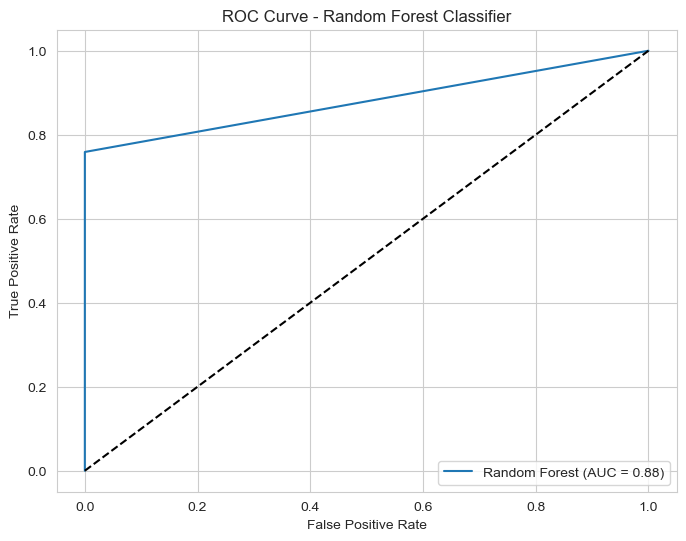

In [45]:
# Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(Y_test, pred_rfc)

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, pred_rfc)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# Concluding Remarks

<b>Q. Demonstrate the performance of the model by using best set of tools.</b>

Although accuracy of Decision Tree Classifier and Random Forest Classifier is almost equal, precision of Random Forest Classifer is higher. Precision is more important because it focuses on minimizing false positives, which are legitimate transactions incorrectly flagged as fraudulent. False positives can lead to customer inconvenience, reputation damage, and increased operational costs. By prioritizing precision, the goal is to ensure that the transactions identified as fraudulent are highly likely to be actual fraud cases. 


Models like Logistic Regression, XGBoost, Bagging and ANN may give good accuracy but they won't give good precision and recall values.

<b>Q. What are the key factors that predict fraudulent customer?</b>
 
The key factors that predict fraudulent customer are:
* Transaction Amount: Unusually large or small transactions.

* Transaction Type: Certain types associated with fraud, such as transfers to unfamiliar accounts.

* Frequency of Transactions: Sudden increases or unusual patterns in transaction frequency.

* Account Balance Changes: Significant and abnormal changes in account balances.

* Transaction Time: Non-business hours, weekends, or holiday periods.

* Previous Fraudulent History: Involvement in past fraudulent activities.

* Behavioral Anomalies: Deviations from normal customer behavior.

<b>Q. Do these factors make sense? If yes, How? If not, How not?</b>

Yes, these factors make sense in the context of fraudulent transaction detection. Here's why:

* Transaction Amount: Unusually large or small transactions can be indicators of fraudulent activity. Fraudsters may attempt to move large sums of money quickly or make small transactions to test stolen credit card information. Deviations from normal transaction amounts can raise red flags.

* Transaction Type: Certain transaction types may have a higher likelihood of being associated with fraud. For example, transfers or payments to unfamiliar or suspicious accounts could be indicative of fraudulent behavior. Different transaction types can have different risk levels, and identifying high-risk types can be useful for fraud detection.

* Frequency of Transactions: Sudden increases or unusual patterns in transaction frequency can suggest fraudulent behavior. Fraudsters may engage in rapid transactions to maximize their gains or test stolen information. Monitoring transaction frequency can help identify abnormal behavior.

* Account Balance Changes: Significant and abnormal changes in account balances can indicate fraudulent activity. Fraudulent customers may frequently empty their accounts, receive large sums of money, or engage in other unusual balance movements. Tracking balance changes can provide insights into potential fraud.

* Transaction Time: The time of day, day of the week, or seasonality of transactions can be significant. Fraudulent activities may exhibit specific patterns during non-business hours, weekends, or holiday periods when monitoring and detection systems are less active. Examining transaction times can uncover such patterns.

* Previous Fraudulent History: Customers with a history of fraudulent behavior are more likely to engage in fraud again. Analyzing historical fraud data and customer profiles can help identify such patterns and flag high-risk customers.

* Behavioral Anomalies: Deviations from typical customer behavior can indicate potential fraud. Sudden changes in spending habits, unusual transaction locations, or inconsistent patterns with a customer's historical data can be signs of fraudulent activity. Identifying behavioral anomalies can assist in detecting fraud.

<b>Q. What kind of prevention should be adopted while company update its infrastructure?</b>

When a company updates its infrastructure, it's important to consider several preventive measures to ensure the security and stability of the systems. Here are some key prevention steps to adopt during the infrastructure update:
* Security Assessment: Assess vulnerabilities and weaknesses in the existing system.
* Access Controls: Implement strong authentication and role-based access controls.
* Network Security: Update firewall configurations, employ intrusion detection/prevention systems, and use network segmentation.
* Patch Management: Regularly apply security patches and updates to software and systems.
* Data Encryption: Encrypt sensitive data at rest and in transit.
* Backup and Disaster Recovery: Establish a robust backup and recovery strategy.
* Employee Training: Provide cybersecurity training to employees.
* Monitoring and Auditing: Implement continuous monitoring and logging mechanisms.
* Penetration Testing: Conduct periodic testing to identify security weaknesses.
* Incident Response Plan: Develop a plan to respond to security incidents effectively.
By following these preventive measures, companies can enhance their infrastructure's security and minimize the risk of security breaches.

<b>Q. Assuming these actions have been implemented, how would you determine if they work?</b>

To determine if the preventive measures are effective:

* Conduct regular security testing to identify vulnerabilities.
* Evaluate the incident response plan during security incidents.
* Perform periodic security audits to assess compliance and identify gaps.
* Continuously monitor and analyze security logs for anomalies.
* Analyze incidents and breaches to identify areas for improvement.
* Gather employee feedback on security practices and awareness.
* Compare measures against industry standards and best practices.
* Engage external security experts for independent assessments.

Using these evaluation methods, you can assess the effectiveness of the preventive measures, identify areas for improvement, and enhance the infrastructure's security.

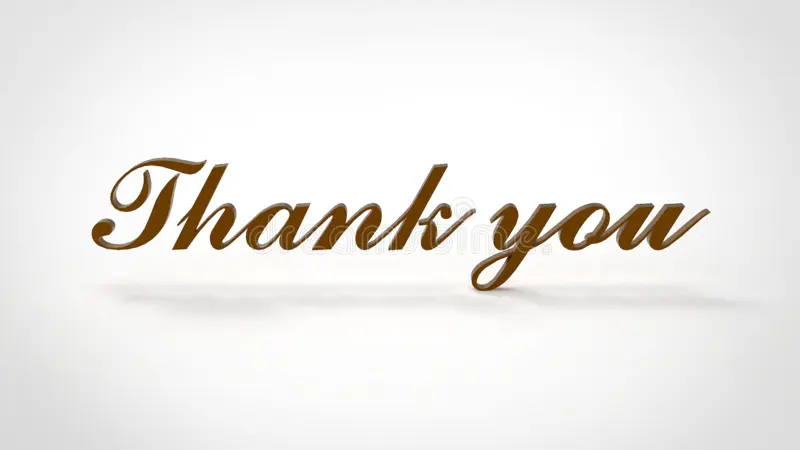